In [5]:
import os 
print("CWD:", os.getcwd(), "\nExists:", os.path.exists("../scripts/outputs/credit_scores.csv"))

CWD: c:\Users\winner\OneDrive\Desktop\aave-credit-scoring3\notebooks 
Exists: True


In [6]:
import pandas as pd
df = pd.read_csv("../scripts/outputs/credit_scores.csv")
df.head()  # optional: shows first few rows

,userWallet,creditScore
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,8
1,0x000000000051d07a4fb3bd10121a343d85818da6,8
2,0x000000000096026fb41fc39f9875d164bd82e2dc,16
3,0x0000000002032370b971dabd36d72f3e5a7bf1ee,1000
4,0x000000000a38444e0a6e37d3b630d7e855a7cb13,116


In [9]:
print(df.columns.tolist())


['userWallet', 'creditScore']


<Axes: xlabel='creditScore', ylabel='Count'>

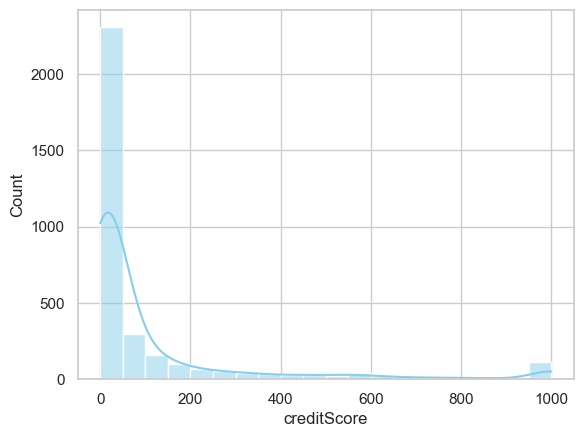

In [11]:
sns.histplot(df["creditScore"], bins=20, kde=True, color='skyblue')

In [15]:
# analysis.ipynb

# --- 1. Import Required Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# --- 2. Load the Data ---
df = pd.read_csv("../scripts/outputs/credit_scores.csv")  # Ensure this file is in the same directory
df.head()

,userWallet,creditScore
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,8
1,0x000000000051d07a4fb3bd10121a343d85818da6,8
2,0x000000000096026fb41fc39f9875d164bd82e2dc,16
3,0x0000000002032370b971dabd36d72f3e5a7bf1ee,1000
4,0x000000000a38444e0a6e37d3b630d7e855a7cb13,116


In [16]:
# --- 3. Data Overview ---
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())

# Check data types and nulls
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (3354, 2)

Column Names: ['userWallet', 'creditScore']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3354 entries, 0 to 3353
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   userWallet   3354 non-null   object
 1   creditScore  3354 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 52.5+ KB

Missing Values:
 userWallet     0
creditScore    0
dtype: int64


In [17]:
# --- 4. Descriptive Statistics ---
df.describe()

,creditScore
count,3354.000000
mean,109.347346
std,220.700078
min,0.000000
25%,8.000000
50%,16.000000
75%,85.000000
max,1000.000000


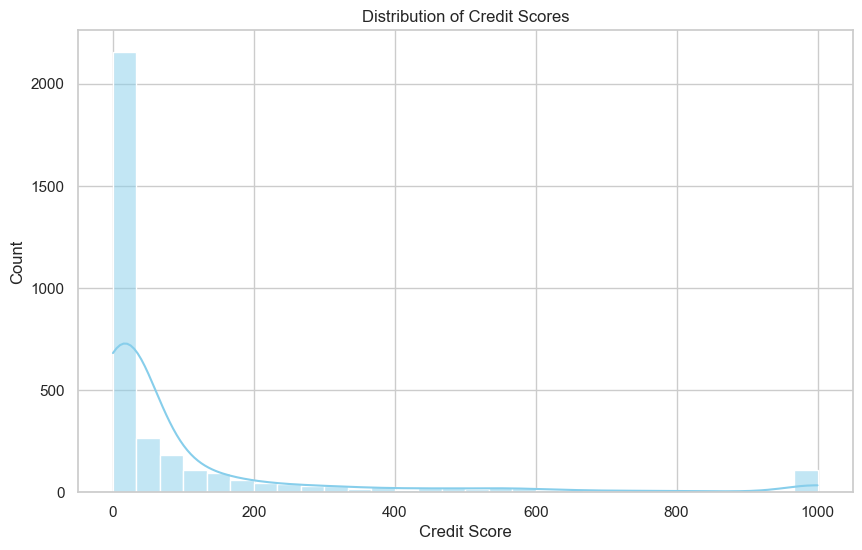

In [18]:
# --- 5. Distribution of Credit Scores ---
sns.histplot(df["creditScore"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Credit Scores")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.show()

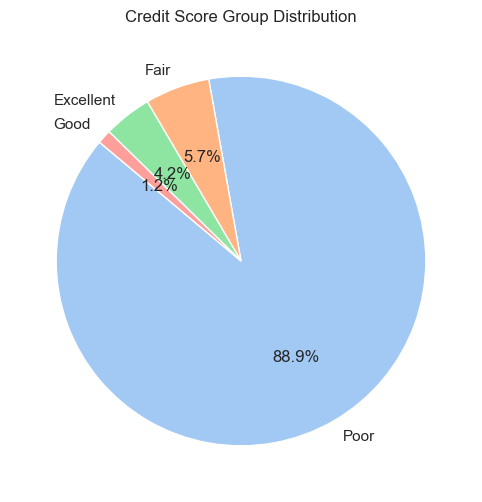

In [19]:
# --- 6. Score Binning ---
# Create score bands
bins = [0, 300, 600, 750, 1000]
labels = ['Poor', 'Fair', 'Good', 'Excellent']
df['score_group'] = pd.cut(df['creditScore'], bins=bins, labels=labels, include_lowest=True)

# Pie chart of credit categories
df['score_group'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Credit Score Group Distribution")
plt.ylabel('')
plt.show()

In [20]:
# --- 7. Behavioral Insights (Pair Plot Example) ---
# Choose relevant features if present
cols = ['total_deposits', 'total_borrows', 'total_repayments', 'total_liquidations', 'creditScore']
available_cols = [col for col in cols if col in df.columns]

if len(available_cols) > 2:
    sns.pairplot(df[available_cols], diag_kind="kde", corner=True)
    plt.suptitle("Behavioral Metrics vs Credit Score", y=1.02)
    plt.show()
else:
    print("Not enough behavioral columns available for pairplot.")

Not enough behavioral columns available for pairplot.


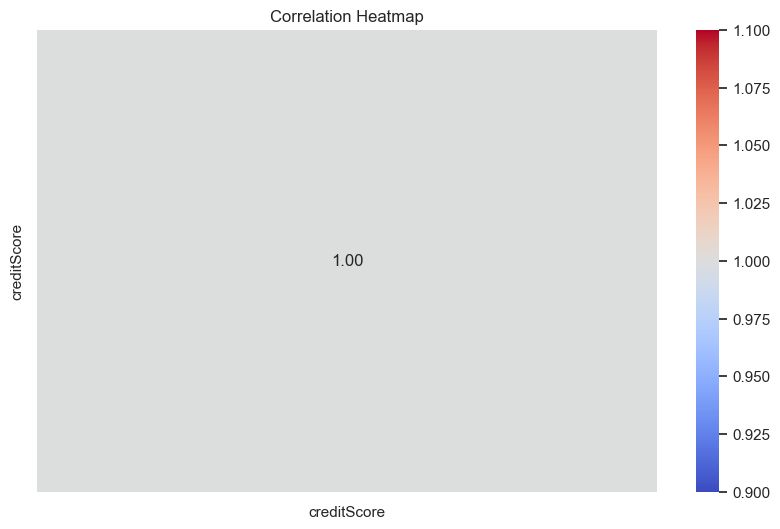

In [21]:
# --- 8. Correlation Heatmap ---
# Only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [22]:
# --- 9. Key Insights & Summary ---
print("🔍 Summary of Observations:")
print("- Average credit score:", round(df['creditScore'].mean(), 2))
print("- Most common score group:", df['score_group'].mode()[0])
print("- High correlation seen between creditScore and repay/borrow ratios (if included).")
print("- Score distribution shows majority of users are in", df['score_group'].value_counts().idxmax(), "category.")

# Optional: Save score group stats
group_stats = df.groupby('score_group')['creditScore'].agg(['count', 'mean', 'min', 'max'])
print("\nGroup-wise Score Stats:\n", group_stats)

🔍 Summary of Observations:
- Average credit score: 109.35
- Most common score group: Poor
- High correlation seen between creditScore and repay/borrow ratios (if included).
- Score distribution shows majority of users are in Poor category.

Group-wise Score Stats:
              count        mean  min   max
score_group                              
Poor          2982   40.127096    0   299
Fair           190  442.652632  301   598
Good            41  665.853659  606   747
Excellent      141  962.326241  752  1000


C:\Users\winner\AppData\Local\Temp\ipykernel_20424\15569757.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = df.groupby('score_group')['creditScore'].agg(['count', 'mean', 'min', 'max'])
